## Basic equations wave theory 


We assume a two-dimentional problem in $xz$-plane, with no viscos effect, fixed bottom depth, and small amplitude waves. Based on these assumption, we can find a potential function $\phi$ that can be used to calculate both horizontal velocityalong $x$-axis and vertical velocity along $z$ axis as follows:

$$u=\frac{\partial \phi}{\partial x} ~~{\rm and }~~w=\frac{\partial \phi}{\partial z}$$

where $\partial$ represents partial derivate operator, $u$ and $w$ are along $x$- and $z$-axis particle velocities respectively. 


The original equation is following Laplace equation:
$$\frac{\partial^2\phi}{\partial x^2}+\frac{\partial^2\phi}{\partial z^2}=0$$

This equation within the water column has following boundary conditions at the time-varying surface $z=\zeta$ and bottom $z=-d$

**Surface boundary conditions (BCs) at $z=\zeta$**

There are two boundary conditions at surface: (1) kinematic BC that implies particles at the surface remains always at the surface.
$$\frac{\partial \zeta}{\partial t}=\frac{\partial \phi}{\partial z}-\frac{\partial \phi}{\partial x}\frac{\partial \zeta}{\partial \zeta} ~~{\rm at} ~~z=\zeta$$


(2) dynamic BC that implies pressure at the surface is equalk to atmospheric pressure:
$$\rho_w \frac{\partial \phi}{\partial t}+\rho_w\left [ \left(\frac{\partial \phi}{\partial x}\right )^2+\left(\frac{\partial \phi}{\partial z}\right )^2\right ]+\rho_w g \zeta =0 $$

where $\rho_w$ is water density (say $1028$ kg/m$^3$), and $g$ is gravitational acceleration (say $9.8$ m/s$^2$ ).

**Bottom boundary condition (BC) at $z=-d$**

This condition implies zero vertical velocity at bottom:
$$\frac{\partial \phi}{\partial z}=0 ~~{\rm at}~~z=-d$$




## Linear wave theory (potential flow)


We simplify above equations specifically BCs at surface to get linear wave theory equations. In order to obtain a linear solution, we assume that the slope of the waves is small and we linearize surface boundary conditions at $z=0$ as follows:

$$\frac{\partial \zeta}{\partial t}-\frac{\partial \phi}{\partial z}=0~~{\rm at} ~~z=0$$
and
$$\frac{\partial \phi}{\partial t}+g\zeta=0 ~~{\rm at} ~~z=0$$

If we merge above two BCs at $z=0$, we have:
$$\frac{\partial^2 \phi}{\partial t^2}+g\frac{\partial \phi}{\partial z}=0~~{\rm at} ~~z=0$$

Solution of Laplace equation based on bottom BC and above linearized surface BC is given as

$$\phi=i\frac{g}{\omega}\zeta_A\frac{\cosh(k(z+d))}{\cosh(kd)}\cos(\omega t-k x)$$


where $\zeta_A$ is the amplitude as half distance between crest and through, $k$ is the wavenumber, $\omega$ denotes angular frequency, $i=\sqrt{-1}$ is the complex unitary value, and $t$ is time. Using representation of $\phi$, we estimate $u$, $w$, pressure $p$ as follows:

$$u=\frac{k g}{\omega}\zeta_A\frac{\cosh(k(z+d))}{\cosh(kd)}\sin(\omega t-k x)$$
$$w=i\frac{k g}{\omega}\zeta_A\frac{\sinh(k(z+d))}{\cosh(kd)}\cos(\omega t-k x)$$
$$p=-\rho_w\frac{\partial \phi}{\partial t}=\rho_w g \zeta_A\frac{\cosh(k(z+d))}{\cosh(kd)}\sin(\omega t-k x)$$


Note that surface elevation here is
$$\zeta=\zeta_A\cos(\omega t - kx)$$

## Dispersion relation

Deispersion relation makes a bridge between time domain and spatial domain as follows:

$$\omega^2=g k \tanh(kd)$$


For deep water $\tanh{kd}\rightarrow 1$ above is rewritten as
$$ \omega^2=g k$$

## Example 1

Assume a wave with amplitude of $\zeta_A=0.2$ m, and frequency of $f=5$ Hz, plot this wave for $4\pi$ seconds (assume $x=0$ for deep water).

Text(0, 0.5, '$\\zeta$ [m]')

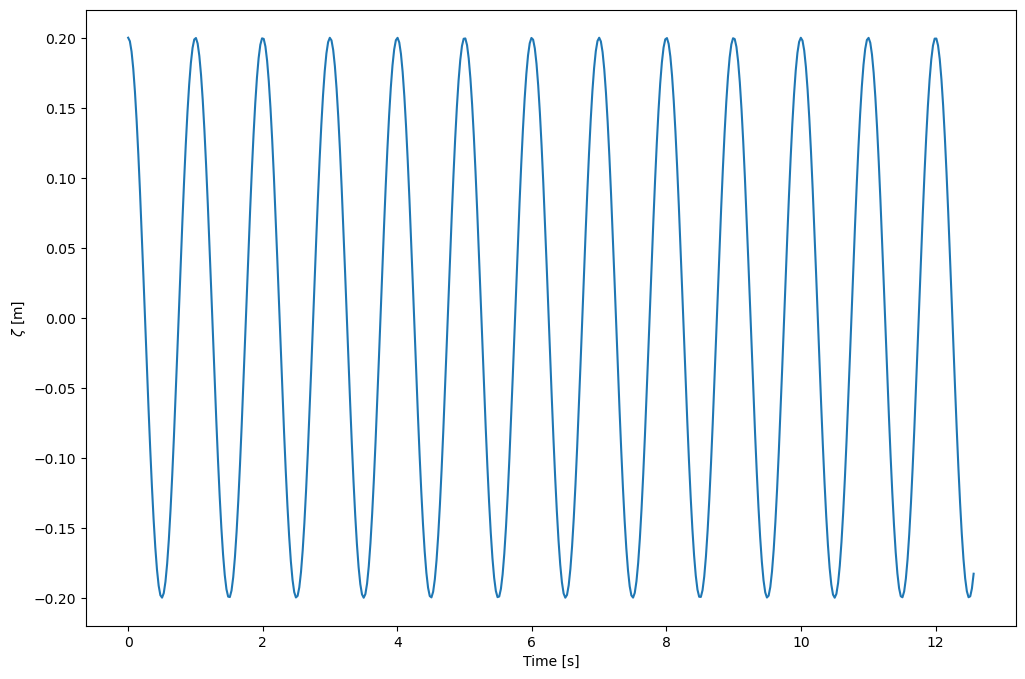

In [9]:
import numpy as np
import matplotlib.pyplot as plt


zetaA=0.2  # wave amplitude
ts=0       # time start
te=4*np.pi # terminal time
freq=1     # Hz frequency


x=0
g=9.8
omega=2*np.pi*freq
k=omega**2/g
time=np.linspace(ts,te,500)
zeta=zetaA*np.cos(omega*time-k*x)


plt.figure(figsize=(12,8))
plt.plot(time,zeta)
plt.xlabel("Time [s]")
plt.ylabel(r"$\zeta$ [m]")

## Example 2

For above wave assume wave propagates from $x=0$ to $x=10$ m and water depth is $d=10$ m, plot time evolution of $u$ as a function of $x$ and $z$ at time $t=2$ s.

Text(0.5, 1.0, '$u$ [m/s]')

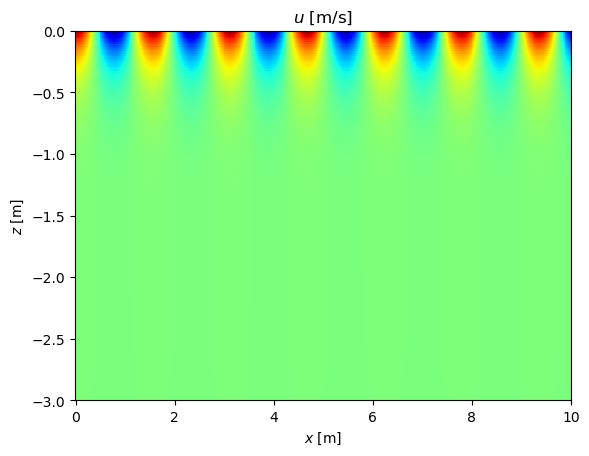

In [27]:
import numpy as np
import matplotlib.pyplot as plt


zetaA=0.2  # wave amplitude
ts=0       # time start
te=4*np.pi # terminal time
freq=1     # Hz frequency
d=10       # water depth
xe=10     # maximum range
nz=512    # number of grid alonf z-axis
nx=512    # number of grid alonf x-axis
time=2.   # ref time

x=0
g=9.8
omega=2*np.pi*freq
k=omega**2/g
zeta=zetaA*np.cos(omega*time-k*x)


x=np.linspace(0,xe,nx)
z=np.linspace(-d,0,nz)

u=np.zeros((nx,nz))
for iz in range(nz):
    for ix in range(nx):
        u[ix,iz]=(k*g)/omega*np.cosh(k*(z[iz]+d))/np.cosh(k*d)*np.cos(omega*time-k*x[ix])
        
        
plt.pcolormesh(x,z,u.T,cmap="jet");
plt.ylim(-3,0)
plt.xlabel(r"$x$ [m]")
plt.ylabel(r"$z$ [m]")
plt.title(r"$u$ [m/s]")